<a href="https://colab.research.google.com/github/eyv7jz/ds1002-eyv7jz/blob/main/22-data-cleaning-in-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Normalized Data

Having cleaned, ordered, organized data makes your next steps easy. Take the `airquality` sample data set for example:

In [1]:
airquality

Ozone,Solar.R,Wind,Temp,Month,Day
<int>,<int>,<dbl>,<int>,<int>,<int>
41,190,7.4,67,5,1
36,118,8.0,72,5,2
12,149,12.6,74,5,3
18,313,11.5,62,5,4
NA,NA,14.3,56,5,5
28,NA,14.9,66,5,6
23,299,8.6,65,5,7
19,99,13.8,59,5,8
8,19,20.1,61,5,9


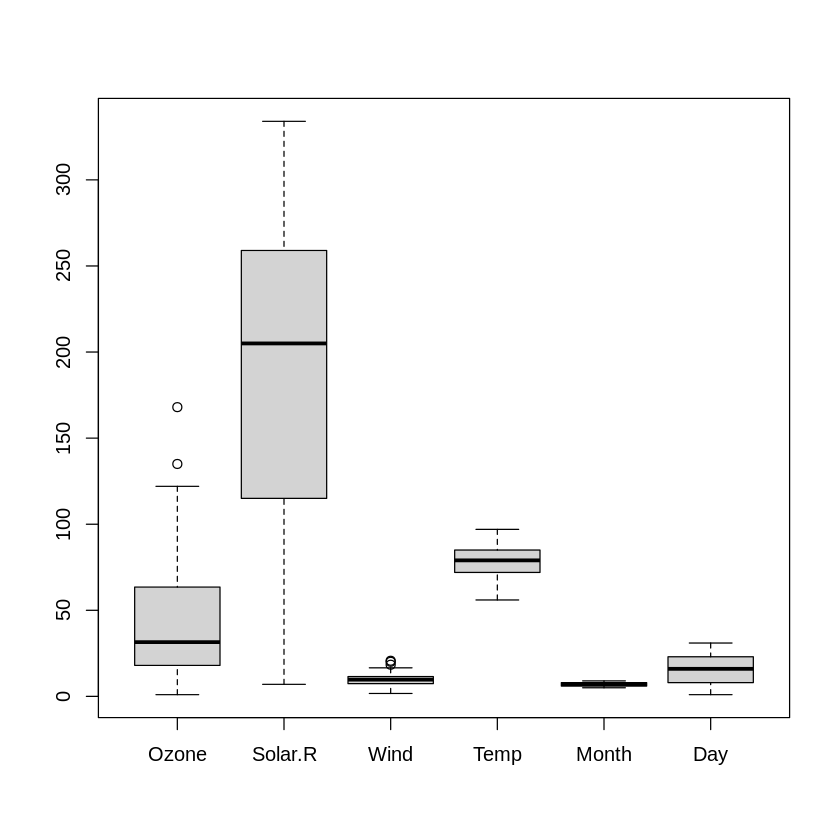

In [2]:
boxplot(airquality)

In [3]:
# I think this isn't working because there are NA values present
hist(airquality)

ERROR: ignored

## Data Cleaning

Normal cleaning and management operations are just as common in R as they are in Python. The most frequent cleaning tasks are:

- Identifying and removing duplicate rows.
- Normalizing data values.
- Finding empty / NULL / `NA` values and determining what to do with them, i.e. deleting, imputing, etc.


In [4]:
df <- read.csv("https://raw.githubusercontent.com/nmagee/ds1002/main/data/very-messy-data-2.csv")

In [5]:
# Use str() to get the structure of the data frame:
str(df)

'data.frame':	1316 obs. of  6 variables:
 $ id          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ sepal_length: num  3.5 3.6 3.8 5.8 4.9 5 4.8 5.5 5.5 NA ...
 $ sepal_width : num  2.9 3.2 NA 2.7 3.6 2.7 3 2.2 2.9 3.4 ...
 $ petal_length: num  1.4 3 2.2 2.6 3 1.4 2.6 2.1 1.1 2.6 ...
 $ petal_width : chr  "0.5" "0.5" "1.5" "1.2" ...
 $ species     : chr  "virginica" "setosa" "setosa" "virginica" ...


In [6]:
# Use summary() to get summary data for each attribute, including empty values.
summary(df)

       id          sepal_length   sepal_width     petal_length  
 Min.   :   1.0   Min.   :3.00   Min.   :2.000   Min.   :1.000  
 1st Qu.: 215.0   1st Qu.:3.80   1st Qu.:2.500   1st Qu.:1.500  
 Median : 379.5   Median :4.60   Median :3.000   Median :2.000  
 Mean   : 442.4   Mean   :4.53   Mean   :2.993   Mean   :2.005  
 3rd Qu.: 671.2   3rd Qu.:5.20   3rd Qu.:3.500   3rd Qu.:2.500  
 Max.   :1000.0   Max.   :6.00   Max.   :4.000   Max.   :3.000  
                  NA's   :72     NA's   :213     NA's   :127    
 petal_width          species         
 Length:1316        Length:1316       
 Class :character   Class :character  
 Mode  :character   Mode  :character  
                                      
                                      
                                      
                                      

In [7]:
df

id,sepal_length,sepal_width,petal_length,petal_width,species
<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,3.5,2.9,1.4,0.5,virginica
2,3.6,3.2,3.0,0.5,setosa
3,3.8,NA,2.2,1.5,setosa
4,5.8,2.7,2.6,1.2,virginica
5,4.9,3.6,3.0,1.2,virginica
6,5.0,2.7,1.4,2.3,setosa
7,4.8,3.0,2.6,1.4,setosa
8,5.5,2.2,2.1,2.1,virginica
9,5.5,2.9,1.1,3,setosa


### Duplicate Rows

To see how many duplicate rows exist in a data frame:

In [8]:
nrow(df[duplicated(df), ])

[1] 316

To remove duplicate rows from a data frame there is a simple one-line command. This will select all NON-duplicated rows from the `df` data frame and pass them into a new data frame named `df2`:

In [11]:
df2 <- df[!duplicated(df), ]

In [12]:
# or, using dplyr, pass the
library(dplyr)
df2 <- df %>% distinct()


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Look for Irregularities

Sometimes a row value will be out of the bounds of expected data values. A good example of this might be a `logical` column where you expect to see `TRUE` and `FALSE`. It's useful to look at a list of the distinct values from a column. Use the `unique()` function to return these.

In [16]:
# unique() will omit the repeats of numbers or values and only display them once
unique(df2$sepal_length)
unique(df2$sepal_width)
unique(df2$petal_length)
unique(df2$petal_width)
unique(df2$species)

[1] 3.5 3.6 3.8 5.8 4.9 5.0 4.8 5.5  NA 3.7 4.7 6.0 3.3 4.1 4.6 3.1 4.4 5.7 5.6
[20] 3.2 3.9 5.9 4.0 5.4 5.3 5.2 3.0 4.3 5.1 4.2 3.4 4.5

[1] 2.9 3.2  NA 2.7 3.6 3.0 2.2 3.4 2.1 3.5 2.0 2.6 2.5 2.4 3.3 3.7 3.1 2.8 3.8
[20] 4.0 3.9 2.3

[1] 1.4 3.0 2.2 2.6 2.1 1.1 1.6 1.2 2.9 1.9 1.3 1.8 2.8 2.5 2.0 2.4 2.7 1.5 2.3
[20]  NA 1.7 1.0

[1] "0.5"  "1.5"  "1.2"  "2.3"  "1.4"  "2.1"  "3"    "1.9"  "1.3"  "gg28"
[11] "2.6"  "0.4"  "0.7"  "0.9"  "1.8"  ""     "gg29" "0.3"  "2.2"  "0.1" 
[21] "2.7"  "2.9"  "1"    "1.6"  "2.4"  "2"    "0.6"  "0.8"  "2.8"  "1.1" 
[31] "0.2"  "1.7"  "0"    "2.5"

[1] "virginica" "setosa"    ""

### Update Values As Needed

To remove or `NA` a specific value within an observation, simply map a new value to a `df` search.

Suppose you want to remove "empty" values and replace them with `NA`, use this syntax:

```
df2[df2==""] <- NA
```

In [18]:
df2[df2=="gg28"] <- NA
df2[df2=="gg29"] <- NA
df2[df2==""] <- NA
head(df2)

,id,sepal_length,sepal_width,petal_length,petal_width,species
,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,1,3.5,2.9,1.4,0.5,virginica
2,2,3.6,3.2,3.0,0.5,setosa
3,3,3.8,NA,2.2,1.5,setosa
4,4,5.8,2.7,2.6,1.2,virginica
5,5,4.9,3.6,3.0,1.2,virginica
6,6,5.0,2.7,1.4,2.3,setosa


In [22]:
petal_width_numeric <- as.numeric(df2$petal_width)
typeof(petal_width_numeric)

[1] "double"

In [25]:
df2$petal_width <- petal_width_numeric
head(df2)

,id,sepal_length,sepal_width,petal_length,petal_width,species
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,3.5,2.9,1.4,0.5,virginica
2,2,3.6,3.2,3.0,0.5,setosa
3,3,3.8,NA,2.2,1.5,setosa
4,4,5.8,2.7,2.6,1.2,virginica
5,5,4.9,3.6,3.0,1.2,virginica
6,6,5.0,2.7,1.4,2.3,setosa


The above method is useful whenever you need to push a replacement value into specific cells.

### Remove Rows with `NA` values

A simple way to do this is to extract only valid data out of the data frame with the `na.omit` method:

**This is a destructive action!**

In [26]:
df_no_empty <- na.omit(df)
str(df_no_empty)

'data.frame':	942 obs. of  6 variables:
 $ id          : int  1 2 4 5 6 7 8 9 11 13 ...
 $ sepal_length: num  3.5 3.6 5.8 4.9 5 4.8 5.5 5.5 3.7 4.7 ...
 $ sepal_width : num  2.9 3.2 2.7 3.6 2.7 3 2.2 2.9 2.1 2 ...
 $ petal_length: num  1.4 3 2.6 3 1.4 2.6 2.1 1.1 1.4 1.2 ...
 $ petal_width : chr  "0.5" "0.5" "1.2" "1.2" ...
 $ species     : chr  "virginica" "setosa" "virginica" "virginica" ...
 - attr(*, "na.action")= 'omit' Named int [1:374] 3 10 12 14 28 32 35 43 51 54 ...
  ..- attr(*, "names")= chr [1:374] "3" "10" "12" "14" ...


In [ ]:
# Two other methods to achieve this:

#Remove rows with NA's using complete.cases
df <- df[complete.cases(df), ]

#Remove rows with NA's using rowSums()
df <- df[rowSums(is.na(df)) == 0, ]

# Or with the tidyverse library
#Remove rows with NA's using drop_na()
library("tidyr")
df <- df %>% drop_na()

### Imputate Missing Data

The question surrounding imputation is WHAT to replace `NA` values with. This question is a data/statistical one and should not be treated lightly. The answer can throw off results greatly.

Because R is a statistical language, getting statistical data values for a column, such as `mean` or `sum` is simple:

In [27]:
nums <- c(4.14,8.26,14.84,18.6,7,11.9)

In [28]:
mean(nums)

[1] 10.79

In [29]:
sum(nums)

[1] 64.74

With that caveat in mind, here is the method for imputing missing values and replacing them with the mean of the rest of the data.

The R below will update the sepal and petal columns by replacing empty values with the mean of the valid values within each column.

In [30]:
df2$sepal_length[is.na(df2$sepal_length)] <- mean(df2$sepal_length, na.rm = T)
df2$sepal_width[is.na(df2$sepal_width)] <- mean(df2$sepal_width, na.rm = T)
df2$petal_length[is.na(df2$petal_length)] <- mean(df2$petal_length, na.rm = T)
df2$petal_width[is.na(df2$petal_width)] <- mean(df2$petal_width, na.rm = T)

df2

id,sepal_length,sepal_width,petal_length,petal_width,species
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,3.500,2.900000,1.4,0.500000,virginica
2,3.600,3.200000,3.0,0.500000,setosa
3,3.800,2.987694,2.2,1.500000,setosa
4,5.800,2.700000,2.6,1.200000,virginica
5,4.900,3.600000,3.0,1.200000,virginica
6,5.000,2.700000,1.4,2.300000,setosa
7,4.800,3.000000,2.6,1.400000,setosa
8,5.500,2.200000,2.1,2.100000,virginica
9,5.500,2.900000,1.1,3.000000,setosa


In [31]:
# Another way to achieve this is using the Hmisc package

df3 <- read.csv("https://raw.githubusercontent.com/nmagee/ds1002/main/data/very-messy-data.csv")
df3 <- df3[!duplicated(df3), ]

install.packages("Hmisc")
library(Hmisc)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘htmlwidgets’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘Formula’



Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




In [32]:
df3$sepal_length <- impute(df3$sepal_length, median)
df3$sepal_width <- impute(df3$sepal_width, median)
df3$petal_length <- impute(df3$petal_length, median)
df3$petal_width <- impute(df3$petal_width, median)

In [33]:
df3

,id,sepal_length,sepal_width,petal_length,petal_width,species
,<int>,<impute>,<impute>,<impute>,<impute>,<chr>
1,1,3.5,2.9,1.4,0.5,virginica
2,2,3.6,3.2,3.0,0.5,setosa
3,3,3.8,3.0,2.2,1.5,setosa
4,4,5.8,2.7,2.6,1.2,virginica
5,5,4.9,3.6,3.0,1.2,virginica
6,6,5.0,2.7,1.4,2.3,setosa
7,7,4.8,3.0,2.6,1.4,setosa
8,8,5.5,2.2,2.1,2.1,virginica
9,9,5.5,2.9,1.1,3.0,setosa


In [34]:
# data()
glimpse(faithful)
?faithful

Rows: 272
Columns: 2
$ eruptions <dbl> 3.600, 1.800, 3.333, 2.283, 4.533, 2.883, 4.700, 3.600, 1.95…
$ waiting   <dbl> 79, 54, 74, 62, 85, 55, 88, 85, 51, 85, 54, 84, 78, 47, 83, …


### Remove Whitespace

Create a simple data frame with extra space characters thrown in:

In [35]:
df_space <- data.frame(first  = c("Boston ", " Chicago ", "New York ", " Minneapolis", " Portland"),
                        second = c("Massachusetts", " Illinois", "New  York", "Minnesota", "  Oregon"),
                        third = c("New England  ", "Mid-West", " New England", "Mid-West", "North-West ")
                      )

In [36]:
df_space$first

[1] "Boston "      " Chicago "    "New York "    " Minneapolis" " Portland"

In [37]:
library(dplyr)
library(stringr)

df_space %>%
  mutate(across(where(is.character), str_trim))

first,second,third
<chr>,<chr>,<chr>
Boston,Massachusetts,New England
Chicago,Illinois,Mid-West
New York,New York,New England
Minneapolis,Minnesota,Mid-West
Portland,Oregon,North-West


In [38]:
df_space$first

[1] "Boston "      " Chicago "    "New York "    " Minneapolis" " Portland"

Note the above `dplyr` does not save the cleaned data. To do this, assign the output into the same/new parameter:

In [39]:
df_space <- df_space %>%
  mutate(across(where(is.character), str_trim))

## Extracting Row Data back into Vector

To extract a column of attributes back into a vector, call it out by appending `$ColName` to the data frame.

In [40]:
df2$sepal_length

# Or assign into a var
sepal_length_extracted <- df2$sepal_width

[1] 3.500 3.600 3.800 5.800 4.900 5.000 4.800 5.500 5.500 4.525 3.700 4.525
  [13] 4.700 6.000 3.300 4.100 4.600 3.700 5.500 3.700 3.100 4.400 5.700 5.600
  [25] 3.200 5.000 3.900 4.525 5.800 4.700 5.900 5.600 4.000 5.600 3.900 3.100
  [37] 4.800 5.400 5.400 5.300 5.200 4.600 5.200 4.100 5.200 3.000 4.300 5.800
  [49] 4.600 3.800 5.700 5.100 4.200 3.900 5.200 3.700 4.525 5.900 4.400 3.000
  [61] 4.700 3.700 5.300 4.700 3.600 3.100 4.200 5.400 5.800 3.400 4.300 4.800
  [73] 6.000 4.525 5.800 3.700 5.700 3.800 5.400 5.000 4.700 3.600 4.300 4.800
  [85] 4.000 5.100 5.000 5.300 4.400 3.300 3.100 4.700 3.100 6.000 3.100 3.700
  [97] 5.000 5.500 4.525 3.000 4.300 5.600 4.700 3.700 5.400 3.300 4.500 5.900
 [109] 4.800 3.500 5.000 5.400 6.000 5.000 3.700 4.300 5.100 5.200 4.800 4.600
 [121] 3.300 4.300 4.700 3.800 5.700 5.800 5.200 5.600 5.600 5.400 4.600 4.525
 [133] 5.200 3.800 3.000 5.800 5.800 5.100 5.900 3.700 5.400 4.525 5.200 4.300
 [145] 4.800 5.600 4.300 3.600 5.300 4.300 4.500 4.800 4.400 4.200 3.700 5.000
 [157] 5.800 5.800 5.400 3.600 5.300 4.600 4.525 3.100 3.900 3.600 3.900 3.500
 [169] 5.300 5.100 3.900 4.300 3.600 3.700 3.900 4.525 4.525 3.400 5.500 4.700
 [181] 5.300 5.700 4.200 3.700 4.700 3.900 4.800 3.600 3.600 3.400 4.600 5.300
 [193] 4.200 4.300 5.200 3.600 5.100 3.400 4.800 4.700 3.500 4.600 5.400 3.200
 [205] 4.400 5.800 5.000 3.700 5.800 3.800 5.800 3.900 3.200 4.600 5.400 5.600
 [217] 4.700 5.500 4.525 4.900 4.200 3.800 4.800 4.600 4.900 5.600 3.300 5.800
 [229] 5.800 4.600 3.700 4.500 4.900 4.900 5.100 3.300 4.800 3.100 3.400 3.600
 [241] 3.500 4.100 5.600 5.700 3.800 5.800 4.800 5.900 3.100 5.000 4.700 3.100
 [253] 5.000 5.200 4.000 3.400 5.800 4.100 5.900 4.525 4.600 4.100 5.300 5.600
 [265] 4.500 4.525 4.100 4.400 5.800 5.700 3.400 4.800 5.600 4.300 3.200 5.100
 [277] 5.200 5.800 3.300 3.000 4.600 5.200 4.300 4.200 4.400 3.600 3.200 3.800
 [289] 5.900 4.000 3.200 4.700 3.500 4.525 4.800 4.900 4.100 4.000 3.200 3.900
 [301] 3.000 4.500 3.600 5.700 5.800 5.100 5.600 5.700 4.200 4.800 3.500 6.000
 [313] 5.800 4.900 3.600 4.525 5.000 5.100 4.600 4.700 3.700 3.700 4.100 3.200
 [325] 4.600 3.900 4.000 5.900 3.300 5.600 4.600 3.800 4.500 3.100 3.500 4.700
 [337] 3.500 3.300 5.500 6.000 5.100 3.500 3.200 3.800 5.300 5.100 3.200 5.600
 [349] 5.800 5.200 6.000 4.800 5.700 4.600 4.900 3.800 5.200 4.100 5.900 3.300
 [361] 5.900 4.100 5.300 5.200 5.200 5.800 5.000 3.900 4.900 4.100 4.200 3.300
 [373] 4.900 4.700 4.900 4.500 5.600 4.300 4.800 5.800 5.500 4.100 4.600 3.700
 [385] 3.400 3.400 4.700 4.900 3.600 5.300 4.500 4.100 4.000 4.800 3.400 4.525
 [397] 3.900 4.000 4.100 5.100 5.700 5.400 4.700 4.800 4.900 3.200 3.300 3.200
 [409] 3.300 4.500 4.800 4.525 5.800 3.300 3.100 4.300 5.700 5.600 4.300 4.100
 [421] 5.000 5.100 3.600 4.300 4.800 5.300 4.200 3.600 5.200 4.525 3.900 5.000
 [433] 4.700 5.400 3.500 3.700 5.400 5.700 3.800 3.200 4.525 3.700 5.300 3.300
 [445] 5.100 4.100 4.300 4.525 5.200 4.200 3.500 4.600 4.900 4.100 4.200 4.400
 [457] 4.800 5.500 5.100 4.900 5.200 5.900 3.100 4.800 4.525 5.900 5.900 4.300
 [469] 4.400 5.900 4.900 3.800 5.400 5.500 4.400 5.200 3.500 3.300 3.800 4.600
 [481] 3.900 4.525 3.700 4.600 4.200 5.400 4.400 5.700 4.700 3.900 5.300 5.300
 [493] 4.500 4.600 5.500 4.900 3.200 3.100 4.800 3.300 4.900 4.200 3.700 3.400
 [505] 3.300 5.300 4.700 4.800 3.400 3.100 4.500 3.800 3.700 3.000 4.000 5.300
 [517] 3.000 6.000 4.525 5.400 4.600 4.525 4.400 4.500 6.000 5.700 4.200 5.100
 [529] 6.000 4.000 6.000 5.600 3.000 3.400 4.525 3.100 5.200 5.700 3.100 4.525
 [541] 4.600 4.900 3.200 3.300 3.100 4.525 5.300 3.200 5.500 5.400 3.200 4.525
 [553] 5.100 3.300 5.800 3.900 5.300 4.800 4.200 3.900 5.700 4.525 4.500 5.300
 [565] 5.500 5.500 4.500 4.700 4.200 5.300 4.100 3.300 4.400 5.400 3.000 3.900
 [577] 3.000 4.300 3.700 4.525 3.400 4.900 4.525 5.400 5.300 4.525 3.300 5.100
 [589] 5.500 5.300 4.400 4.200 3.100 4.800 4.100 3.800 3.500 4.525 4.900 4.300
 [601] 3.400 5.500 5.000 5.000 5.600 4.525 5.000 4.50